# Tensors & Stochastic Gradient Descent (SGD) in PyTorch

## I. Import Libraries

In [0]:
import torch
from torch import nn
import seaborn as sns
torch.manual_seed(42); # set for reproducibility

## II. Tensors

A brief exploration of tensors in PyTorch.

### Generating Tensors

Following are the various ways to generate tensors in PyTorch and check its datatypes.

In [443]:
print(torch.tensor(1), '->', torch.tensor(1).dtype)
print(torch.empty(1), '->', torch.empty(1).dtype)
print(torch.FloatTensor(1), '->', torch.FloatTensor(1).dtype)
print(torch.Tensor(1), '->', torch.Tensor(1).dtype)

tensor(1) -> torch.int64
tensor([1.5283e-35]) -> torch.float32
tensor([1.5283e-35]) -> torch.float32
tensor([2.4548e-37]) -> torch.float32


> Note : Here `torch.tensor()` with a single number actually returns a scalar values whereas the othersreturn a tensor.

### Specifying data types and type coercion

In [444]:
x = torch.tensor(1, dtype=torch.float32)
print(x.dtype)
y = torch.tensor(1., dtype=torch.int32)
print(y.dtype)

torch.float32
torch.int32


However we cannot do this with `torch.Tensor()`

In [445]:
torch.Tensor(1, dtype=torch.float32)

TypeError: ignored

`torch.Tensor` is an alias for `torch.FloatTensor` and sets the default datatype to float rather than inferring it from the vector/matrix passed. On the otherhand, datatypes can be explicitly stated with`torch.tensor`.  

Lets verify with their data types,

In [446]:
print(torch.Tensor([1.,2]).dtype) # i.e the default datatype
torch.Tensor([1.,2]).dtype == torch.FloatTensor([1, 2]).dtype

torch.float32


True

For `torch.tensor`,

In [450]:
print(torch.tensor([1.,2])) # The dot at the end signifies all numbers are to be taken as floats.
print(torch.tensor([1, 2]))

tensor([1., 2.])
tensor([1, 2])


We can check sizes/shapes of tensors by,

In [451]:
torch.tensor([1,1]).size()

torch.Size([2])

Now lets set the number of data points  **n** and create a tensor of **n x 2** dimensions as follows,

In [459]:
n = 10 # data points
x = torch.ones(n,2) # Generate vector/matrix of ones
print(x.dtype) # datatype
print(x.size()) # size of tensor. Note : torch.shape is similar to torch.size()

torch.float32
torch.Size([10, 2])


> Note : We have kept the second column as ones since a predictor needs to have a column with values as ones, which corresponds to the coefficient/parameter with the intercept.

Now lets generate a tensor with numbers drawn from a **uniform distribution**,

In [0]:
torch.rand([3,5]) # return a tensor of dimension x,y with numbers drawn from a uniform distribution U ~ [0,1)

tensor([[0.4294, 0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317, 0.1053],
        [0.2695, 0.3588, 0.1994, 0.5472, 0.0062]])


We can replace the first column of x with numbers drawn from a uniform distribution $U ~ [0, 1)$.  
`uniform_` here does operations inplace (anything with a 
underscore at the end means inplace)

> Note : If U is a random variable uniformly distributed on [0, 1], then  
$(r1 - r2) * U + r2$  
is uniformly distributed on $[r1, r2]$


In [0]:
# Define a few variables
a = 1; b = 2; r1 = -1; r2 = 1

# To sample from a uniform distribution
# Approach 1
print((r1 - r2) * torch.rand(a, b) + r2)

# Approach 2
print(torch.FloatTensor([a, b]).uniform_(r1, r2))

tensor([[ 0.3247, -0.6179]])
tensor([0.1559, 0.8080])


In [474]:
x[:,0].uniform_(-1.,1)
print(x)

tensor([[-0.3545,  1.0000],
        [-0.9676,  1.0000],
        [-0.5727,  1.0000],
        [ 0.2498,  1.0000],
        [-0.1320,  1.0000],
        [-0.7259,  1.0000],
        [ 0.0235,  1.0000],
        [-0.6831,  1.0000],
        [-0.8484,  1.0000],
        [-0.5507,  1.0000]])


### Initializing parameters

Lets initalize the slope and the intercept of a linear regression model as follows,

In [475]:
# Initializing the slope and intercept AKA the parameters, weights, coefficients
# of the equation
a = torch.tensor([3.,2]) 
print(a)

tensor([3., 2.])


Some pointers :
* `@` in python is an opeartor for matrix multiplication (`@=` is the inplace version)
* `*` is elementwise product between two matrices or vectors

No we perform matrix multiplication between the parameters and x as follows,

In [476]:
print('size of x :', x.size())
print('size of a :', a.size())
print((x@a).size())
x@a

size of x : torch.Size([10, 2])
size of a : torch.Size([2])
torch.Size([10])


tensor([ 0.9365, -0.9028,  0.2820,  2.7494,  1.6040, -0.1777,  2.0704, -0.0492,
        -0.5452,  0.3480])

Lets sample n random variables from U ~ [0,1) as follows,

In [477]:
b = torch.rand(n)
print(b)

tensor([0.0624, 0.1816, 0.9998, 0.5944, 0.6541, 0.0337, 0.1716, 0.3336, 0.5782,
        0.0600])


This would be the random noise i.e. irreducible error in the function.

Lets generate y from the equation of the line (linear regression),

In [478]:
y = x@a + b
print(y)

tensor([ 0.9988, -0.7212,  1.2818,  3.3438,  2.2581, -0.1440,  2.2420,  0.2843,
         0.0330,  0.4081])


Now plotting the same,

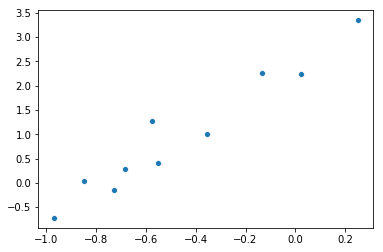

In [479]:
sns.scatterplot(x=x[:,0], y=y);

## III. Stochastic Gradient Descent (SGD)

SGD is one of the most commonly used **optimization** algorithms for deep learning. Here is a simple demonstration of SGD for Linear Regression, one of the simplest, most commonly used and highly interpretable machine learning models.

> Note : Here we are just performing a simple gradient descent. For it to be *stochastic* the only difference is calculating the gradients and updating the weights/parameters for each minibatch instead of the whole dataset. 

We define our loss function as the mean squared error (MSE) a follows,

In [0]:
def mse(y_hat, y): 
    
    return torch.mean((y_hat-y)**2)

And again initialize some parameters,

In [516]:
a = torch.rand(2) # initialize the parameters
print(a)

# calculating y_hat i.e. the predicted value
y_hat = x@a
print(y_hat)

# calculating the mse
mse(y_hat, y)

tensor([0.3289, 0.1054])
tensor([-0.0112, -0.2128, -0.0830,  0.1875,  0.0620, -0.1333,  0.1131, -0.1193,
        -0.1736, -0.0757])


tensor(2.2899)

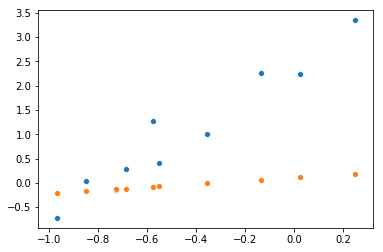

In [517]:
sns.scatterplot(x[:,0],y);
sns.scatterplot(x[:,0],y_hat);

We can see how much the predicted points are diverging from the true values (hence larger values of loss). Now lets wrap the parameters as PyTorch `nn.Parameter`

In [518]:
a = nn.Parameter(torch.rand(2));
print(a)

Parameter containing:
tensor([0.9192, 0.4008], requires_grad=True)


> Note : `requires_grad=True` would automatically calculate gradients via automatic differentiation

Defining a update rule as follows,

In [0]:
def update(lr=1e-03, i=0):
    
    y_hat = x@a
    
    loss = mse(y_hat, y)
    
    if i % 10 == 0: 
        print(loss)
        
    # calculates the gradients/derivatives of the parameters; stores it in .grad
    loss.backward()
    
    with torch.no_grad(): # turn gradient calculation off
        
        a.sub_(lr * a.grad) # inplace subtraction of gradient 
        a.grad.zero_() # clear all gradients

Running the gradient descent loop,

In [520]:
# specify hyperparameters
lr = 1e-1
epochs = 500

# Training loop
for i in range(epochs): 
    update(lr, i)

tensor(1.8188, grad_fn=<MeanBackward0>)
tensor(0.6996, grad_fn=<MeanBackward0>)
tensor(0.4738, grad_fn=<MeanBackward0>)
tensor(0.3330, grad_fn=<MeanBackward0>)
tensor(0.2442, grad_fn=<MeanBackward0>)
tensor(0.1882, grad_fn=<MeanBackward0>)
tensor(0.1528, grad_fn=<MeanBackward0>)
tensor(0.1305, grad_fn=<MeanBackward0>)
tensor(0.1165, grad_fn=<MeanBackward0>)
tensor(0.1076, grad_fn=<MeanBackward0>)
tensor(0.1020, grad_fn=<MeanBackward0>)
tensor(0.0985, grad_fn=<MeanBackward0>)
tensor(0.0962, grad_fn=<MeanBackward0>)
tensor(0.0948, grad_fn=<MeanBackward0>)
tensor(0.0939, grad_fn=<MeanBackward0>)
tensor(0.0934, grad_fn=<MeanBackward0>)
tensor(0.0930, grad_fn=<MeanBackward0>)
tensor(0.0928, grad_fn=<MeanBackward0>)
tensor(0.0927, grad_fn=<MeanBackward0>)
tensor(0.0926, grad_fn=<MeanBackward0>)
tensor(0.0925, grad_fn=<MeanBackward0>)
tensor(0.0925, grad_fn=<MeanBackward0>)
tensor(0.0925, grad_fn=<MeanBackward0>)
tensor(0.0925, grad_fn=<MeanBackward0>)
tensor(0.0924, grad_fn=<MeanBackward0>)


Displaying the learned parameter values,

In [521]:
print(a)

Parameter containing:
tensor([3.1377, 2.4298], requires_grad=True)


Plotting the same,

Parameter containing:
tensor([3.1377, 2.4298], requires_grad=True)


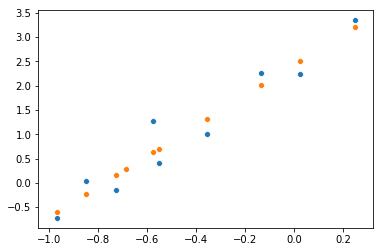

In [522]:
sns.scatterplot(x[:,0],y);
# sns.scatterplot(x[:,0], y_hat);
with torch.torch.no_grad():
    print(a)
    sns.scatterplot(x[:,0], x@a);

# References
[1] fast.ai v3 Part 1 Lesson 2 https://course.fast.ai/videos/?lesson=2  
[2] https://stackoverflow.com/questions/44328530/how-to-get-a-uniform-distribution-in-a-range-r1-r2-in-pytorch